## 类实现

### 二叉树对象

In [4]:
from binarytree import tree,Node
from copy import deepcopy
from math import log

In [51]:
class BTree(Node):
    """二叉树，继承 Node 的显示功能
    根节点序数为1，深度为0
    
    """
    
    def __init__(self, value = 0):
        """更新旧的初始化"""
        Node.__init__(self, value) # 使用原初始化
        self.depth = 0 # 根节点深度
        self.position = 1 # 序数表述
        self.max_depth = 0 # 总深度
        
    @property
    def last_layer(self):
        """返回最后一层节点"""
        return [l for l in self.leaves if l.depth==self.max_depth]
    
    def new_trees(self,k):
        """生成新树，非叶节点个数为k"""
        last_layer = self.last_layer
        num = len(last_layer)
        indexs = choose(list(range(num)),k)
        return [self.new_tree_by_index(index) for index in indexs]
    
    def new_tree_by_index(self,index):
        """将指定节点生成两个叶节点，得到新树
        输入为最后一层节点的索引"""
        # 复制对象
        tree = deepcopy(self)
        # 获取最后一层
        last_layer = tree.last_layer
        for i in index:
            # 添加两个节点
            self.add_left_right_nodes(last_layer[i])
        tree.max_depth += 1
        return tree
    
    @staticmethod
    def add_left_right_nodes(node):
        """添加左右子结点，并增加属性"""
        # 左节点
        left = Node(0)
        left.depth = node.depth + 1
        left.position = 2 * node.position
        # 右节点
        right = Node(0)
        right.depth = node.depth + 1
        right.position = 2 * node.position +1
        # 赋值
        node.left,node.right = left,right
    
    

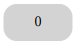

In [62]:
# 初始化
t = BTree()
t

In [64]:
# 选择第0位置，添加叶结点
new1 = t.new_tree_by_index([0])
print(new1)
# 选择第0,1位置，添加叶结点
new2 = new1.new_tree_by_index([0,1])
print(new2)
# 选择第0,1,3位置，添加叶结点
new3 = new2.new_tree_by_index([0,1,3])
print(new3)


  0
 / \
0   0


    __0__
   /     \
  0       0
 / \     / \
0   0   0   0


        ______0__
       /         \
    __0__         0__
   /     \       /   \
  0       0     0     0
 / \     / \         / \
0   0   0   0       0   0



In [65]:
# 取两个位置生成节点，得到新树
trees = new2.new_trees(2)
for tree in trees:
    print(tree)


        ______0__
       /         \
    __0__         0
   /     \       / \
  0       0     0   0
 / \     / \
0   0   0   0


        __0______
       /         \
    __0         __0
   /   \       /   \
  0     0     0     0
 / \         / \
0   0       0   0


    ______0______
   /             \
  0__           __0
 /   \         /   \
0     0       0     0
     / \     / \
    0   0   0   0


        __0__
       /     \
    __0       0__
   /   \     /   \
  0     0   0     0
 / \             / \
0   0           0   0


    ______0__
   /         \
  0__         0__
 /   \       /   \
0     0     0     0
     / \         / \
    0   0       0   0


    __0______
   /         \
  0         __0__
 / \       /     \
0   0     0       0
         / \     / \
        0   0   0   0



### 非叶节点生成树

In [87]:
def check_nonleaves(nonleaves):
    """检查非叶节点序列"""
    if len(nonleaves)==0:return False
    if len(nonleaves)==1:return True
    return all([2*i>=j for i,j in zip(nonleaves[:-1],nonleaves[1:])])

In [90]:
# 测试
print(check_nonleaves([1,2,4]))
print(check_nonleaves([1,2,5]))

True
False


In [92]:
def nonleaves_to_trees(nonleaves):
    """由非叶节点序列生成树"""
    # 新树集合
    assert check_nonleaves(nonleaves), "非叶序列输入有误"
    trees = [BTree()]
    for ak in nonleaves:
        if ak == 0: # 后续没有节点了
            break
        new_trees = [] # 新一层
        for tree in trees: # 对上层遍历
            new_trees.extend(tree.new_trees(ak))
        trees = new_trees
    return new_trees

In [98]:
# 测试
trees = nonleaves_to_trees([1,2,1,2,1,2,0,0])
for i in trees[:3]:
    print(i)
print(len(trees))


                            __0__
                           /     \
                    ______0       0
                   /       \     / \
                __0__       0   0   0
               /     \
        ______0       0
       /       \     / \
    __0__       0   0   0
   /     \
  0       0
 / \     / \
0   0   0   0


                            __0__
                           /     \
                    ______0       0
                   /       \     / \
    ______________0__       0   0   0
   /                 \
  0______             0
 /       \           / \
0       __0__       0   0
       /     \
      0       0
     / \     / \
    0   0   0   0


                            __0__
                           /     \
        __________________0       0
       /                   \     / \
    __0______________       0   0   0
   /                 \
  0             ______0
 / \           /       \
0   0       __0__       0
           /     \
          0       0
      

In [99]:
# 测试
trees = nonleaves_to_trees([1,1,2,2,3,2,3,0])
for i in trees[:3]:
    print(i)
print(len(trees))


                                                ______0
                                               /       \
                                    __________0__       0
                                   /             \
                            ______0______         0
                           /             \       / \
                __________0__           __0     0   0
               /             \         /   \
        ______0______         0       0     0
       /             \       / \     / \
    __0__           __0     0   0   0   0
   /     \         /   \
  0       0       0     0
 / \     / \     / \
0   0   0   0   0   0


                                                ______0
                                               /       \
                                    __________0__       0
                                   /             \
                            ______0______         0
                           /             \       / \
                _____

### 数据的 n 元集子 

In [7]:
def choose(data,n):
    """从 data 中取 n 个元素(Python 自带工具太少了！)"""
    if n == 0: return []
    if n == 1: return [[i] for i in data]
    if n == len(data): return [data]
    omitlast = choose(data[:-1],n)
    takelast = [ i+[data[-1]] for i in choose(data[:-1],n-1)]
    return omitlast+takelast

In [71]:
len(choose(list(range(10)),3))

120

### 叶节点转非叶节点序列

In [12]:
def leafs_to_nonleafs(leafs):
    """叶节点序列转非叶节点序列"""
    # 层数
    n = len(leafs)
    assert n>0, "输入不能为空列表"
    # 非叶节点序列和总节点序列
    nonleafs,nodes = [1-leafs[0]],[1]
    for i in leafs[1:]:
        nodes.append(2*nonleafs[-1]) # 总节点数
        nonleafs.append(nodes[-1]-i) # 可用根节点数
    # 检查未项是否只剩叶节点
    assert nonleafs[-1]==0,"输入叶节点序列不完整"
    return nonleafs

In [14]:
# 调试函数
leafs1 = [0,0,3,0,3,0,4,0]
leafs2 = [0,1,0,2,1,4,1,6]
print(leafs_to_nonleafs(leafs1))
print(leafs_to_nonleafs(leafs2))

[1, 2, 1, 2, 1, 2, 0, 0]
[1, 1, 2, 2, 3, 2, 3, 0]


## 汇总

In [156]:
from binarytree import Node
from copy import deepcopy
from math import log

In [157]:
class BTree(Node):
    """二叉树，继承 Node 的显示功能
    根节点序数为1，深度为0
    ps：总深度不会自动更新，用外部函数增加节点要注意
    """
    
    def __init__(self, value = 0):
        """更新旧的初始化"""
        Node.__init__(self, value) # 使用原初始化
        # 新增属性
        self.depth = 0 # 根节点深度
        self.position = 1 # 序数表述
        self.max_depth = 0 # 总深度
        
    @property
    def last_layer(self):
        """返回最后一层节点"""
        return [l for l in self.leaves if l.depth==self.max_depth]
    
    def new_trees(self,k):
        """生成新树，非叶节点个数为k"""
        last_layer = self.last_layer
        num = len(last_layer)
        indexs = choose(list(range(num)),k)
        return [self.new_tree_by_index(index) for index in indexs]
    
    def new_tree_by_index(self,index):
        """将指定节点生成两个叶节点，得到新树
        输入为最后一层节点的索引"""
        # 复制对象
        tree = deepcopy(self)
        # 获取最后一层
        last_layer = tree.last_layer
        for i in index:
            # 添加两个节点
            self.add_left_right_nodes(last_layer[i])
        tree.max_depth += 1
        return tree
    
    @classmethod
    def add_left_right_nodes(cls,node):
        """添加左右子结点，并增加 depth 和 position 属性"""
        # 左节点
        node.left = cls.new_left(node)
        # 右节点
        node.right = cls.new_right(node)
    
    @staticmethod
    def new_left(node,value=0):
        """添加左节点，增加了 depth 和 position 属性"""
        left = Node(value)
        left.depth = node.depth + 1
        left.position = 2 * node.position
        return left
    
    @staticmethod
    def new_right(node,value=0):
        """添加右节点，增加了 depth 和 position 属性"""
        right = Node(value)
        right.depth = node.depth + 1
        right.position = 2 * node.position + 1
        return right
        
    @staticmethod
    def check_nonleaves(nonleaves):
        """检查非叶节点序列"""
        if len(nonleaves)==0:return False
        if len(nonleaves)==1:return True
        return all([2*i>=j for i,j in zip(nonleaves[:-1],nonleaves[1:])])
    
    @classmethod
    def nonleaves_to_trees(cls,nonleaves):
        """由非叶节点序列生成树"""
        # 新树集合
        assert cls.check_nonleaves(nonleaves), "非叶序列输入有误"
        trees = [BTree()]
        for ak in nonleaves:
            if ak == 0: # 后续没有节点了
                break
            new_trees = [] # 新一层
            for tree in trees: # 对上层遍历
                new_trees.extend(tree.new_trees(ak))
            trees = new_trees
        return new_trees
    
    @staticmethod
    def leaves_to_nonleaves(leaves):
        """叶节点序列转非叶节点序列"""
        # 层数
        n = len(leaves)
        assert n>0, "输入不能为空列表"
        # 非叶节点序列和总节点序列
        nonleaves,nodes = [1-leaves[0]],[1]
        for i in leaves[1:]:
            nodes.append(2*nonleaves[-1]) # 总节点数
            nonleaves.append(nodes[-1]-i) # 可用根节点数
        # 检查未项是否只剩叶节点
        assert nonleaves[-1]==0,"输入叶节点序列不完整"
        return nonleaves
    
    @classmethod
    def list_to_tree(cls,positions):
        """用一维列表输入树，空节点位置用 None"""
        n = len(positions)
        assert n, "输入列表不能为空"
        assert positions[0] is not None,"根节点不能为空"
        # 最长深度
        depth = int(log(n,2))
        # 初始化根节点
        tree = BTree(positions[0])
        while True:
            last_layer = tree.last_layer
            flag = False # 标记是否有新节点
            for node in last_layer:
                # 检查两个叶节点是否非 None
                pos = 2 * node.position
                # 左节点
                if pos>n: continue
                if positions[pos-1] is not None:
                    flag = True
                    node.left = cls.new_left(node,positions[pos-1])
                # 右节点
                if pos+1>n: continue
                if positions[pos] is not None:
                    flag = True
                    node.right = cls.new_right(node,positions[pos])
            if flag: # 有新节点生成
                tree.max_depth += 1
            else:
                break
        return tree

def choose(data,n):
    """从 data 中取 n 个元素(Python 自带工具太少了！)"""
    if n == 0: return []
    if n == 1: return [[i] for i in data]
    if n == len(data): return [data]
    omitlast = choose(data[:-1],n)
    takelast = [ i+[data[-1]] for i in choose(data[:-1],n-1)]
    return omitlast+takelast

## 计算开销

### 列表转树

In [147]:
def list_to_tree(positions):
    """用一维列表输入树，空节点位置用 None"""
    n = len(positions)
    assert n, "输入列表不能为空"
    assert positions[0] is not None,"根节点不能为空"
    # 最长深度
    depth = int(log(n,2))
    # 初始化根节点
    tree = BTree(positions[0])
    while True:
        last_layer = tree.last_layer
        flag = False # 标记是否有新节点
        for node in last_layer:
            # 检查两个叶节点是否非 None
            pos = 2 * node.position
            # 左节点
            if pos>n: continue
            if positions[pos-1] is not None:
                flag = True
                node.left = BTree.new_left(node,positions[pos-1])
            # 右节点
            if pos+1>n: continue
            if positions[pos] is not None:
                flag = True
                node.right = BTree.new_right(node,positions[pos])
        if flag: # 有新节点生成
            tree.max_depth += 1
        else:
            break
    return tree

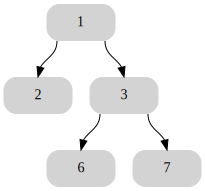

In [148]:
# 测试
positions = [1, 2, 3, None, None, 6, 7]
list_to_tree(positions)

In [197]:
# 输入新树和旧树
# 新树
trees = BTree.nonleaves_to_trees([1,2,1,2,1,2,0,0])
new_tree = trees[0]
# 旧树
positions = [None for i in range(2**8)]
pos = [1, 
       2,3, 
       4,5, 
       8,9,10,11, 
       16,17,22,23, 
       32,33,34,35,46,47,
       68,69,70,71,
       136,137,138,139,142,143]
value = [0,
        0,10,
        0,0,
        0,20,5,0,
        0,0,7,0,
        10,20,0,0,0,6,
        0,0,5,0,
        10,6,3,10,7,2]
for p,v in zip(pos,value):
    positions[p-1] = v
old_tree = BTree.list_to_tree(positions)

In [183]:
# 打印
print(new_tree,old_tree,sep="\n")


                            __0__
                           /     \
                    ______0       0
                   /       \     / \
                __0__       0   0   0
               /     \
        ______0       0
       /       \     / \
    __0__       0   0   0
   /     \
  0       0
 / \     / \
0   0   0   0


                                             ______________0
                                            /               \
                                        ___0__               10
                                       /      \
          ____________________________0        0__
         /                             \      /   \
     ___0________________               20   5     0__
    /                    \                        /   \
  _0               _______0__                    7     0
 /  \             /          \                        / \
10   20        __0__          0__                    0   6
              /     \        /   \
           

### 获取修改节点

In [241]:
"""参见示例"""
old_leafs = {node.position for node in old_tree.leaves}

new_leafs = {node.position for node in new_tree.leaves}

com = new_leafs.difference(old_leafs)
sep = old_leafs.difference(new_leafs)


## 舍弃方法 

### 求子结点集合

In [ ]:
from math import log
def child_node_set(node,n):
    """计算节点所有子结点构成的集合
    node 节点对应数字
    n 层数
    为标号方便，根节点记为1，顶层记为第0层
    """
    level = int(log(node,2))
    assert level<=n, "总层数有误"
    if level == n: return [n]
    
    # 函数：求下一层节点
    next_nodes = lambda x: [2*x,2*x+1]
    
    # BFS 生成所有子节点
    nodes = [[node]]
    for i in range(n-level):
        new_nodes = []
        for x in nodes[-1]:
            new_nodes.extend(next_nodes(x))
        nodes.append(new_nodes)
    return sum(nodes,[]) # 相当于 flatten

In [ ]:
# 测试
child = child_node_set(4,5)
print(child)

In [ ]:
# 测试
sep,com = get_operate(new_tree,old_nodes,n)
print("拆开的位置",sep,"合并的位置",com)
operate = sep.union(com)
cost = sum([positions[i-1] for i in operate])
print(cost)

In [214]:
def reduce_child_set(child):
    """将展开的节点重新合并"""
    return {i for i in child if i//2 not in child}

In [221]:
child2 = child_node_set(3,5)
reduce_child_set(child+child2)

{3, 4}

### 开销信息

In [ ]:
def get_change_nodes(tree,n):
    """化完全二叉树要展开的节点"""
    assert n >= tree.max_depth,"层数有误"
    # 展开的叶子节点
    leaves_pos = [node.position for node in tree.leaves if node.depth < tree.max_depth]
    # 展开涉及的子结点
    return set(sum([child_node_set(i,n-1) for i in leaves_pos],[]))

In [ ]:
# 测试
n = 8
old_nodes = get_change_nodes(old_tree,n)
new_nodes = get_change_nodes(new_tree,n)
print(len(old_nodes),len(new_nodes))

In [ ]:
# function discard!
def get_operate(new_tree,old_nodes,n):
    """计算操作损失"""
    new_nodes = get_change_nodes(new_tree,n)
    # 拆开的位置
    separate = old_nodes.difference(new_nodes)
    # 合并的位置
    combine = new_nodes.difference(old_nodes)
    return reduce_child_set(separate),reduce_child_set(combine)

In [ ]:
def operate_and_cost(new_nodes,old_nodes,positions,n):
    """操作开销"""
    # 展开开销
    separate = old_nodes.difference(new_nodes) # 展开节点
    sep = reduce_child_set(separate) # 约化
    sep_cost = sum(positions[i-1] for i in sep)
    
    # 合并开销
    combine = new_nodes.difference(old_nodes) # 展开节点
    com = reduce_child_set(combine) # 约化
    com_nodes = sum([child_node_set(i,n) for i in com],[]) # 所有节点
    com_cost = sum(positions[i-1] for i in com_nodes if positions[i-1] is not None)
    # 总开销
    cost = sep_cost + com_cost
    return sep,com,cost,separate